In [13]:
import numpy as np
import cv2
%matplotlib inline
from matplotlib import pyplot as plt

This is a small program for fixing images’ perspective. It works by estimating homography between two images. Given the set of correspondent points in two images, our goal is to build a matrix of transformation so that we can multiply it with the flawed image to get the fixed one. In the program we do that by making matrix A that consists of reference points in the first image and corresponding points in the second. By decomposing the matrix with singular value decomposition, we get parameters for our transformation matrix. After that we use an inbuilt function wrapPerspective that takes our transformation matrix and outputs an image with a fixed perspective.

In [14]:
def estimate_homography(xr,yr,xt,yt):

    A = np.zeros((2*xr.shape[0],9))
    for i in np.arange(xr.shape[0]):
        A[2*i,:] = [xr[i], yr[i], 1, 0, 0, 0, -xt[i]*xr[i], -xt[i]*yr[i], -xt[i]]
        A[2*i+1,:] = [0, 0, 0, xr[i], yr[i], 1, -yt[i]*xr[i], -yt[i]*yr[i], -yt[i] ]
        
    _, _, vh = np.linalg.svd(A)
    h = np.transpose(vh[-1,:]) / vh[-1,-1]
    
    return h.reshape((3,3))

Text(0.5, 1.0, 'Image after transformation')

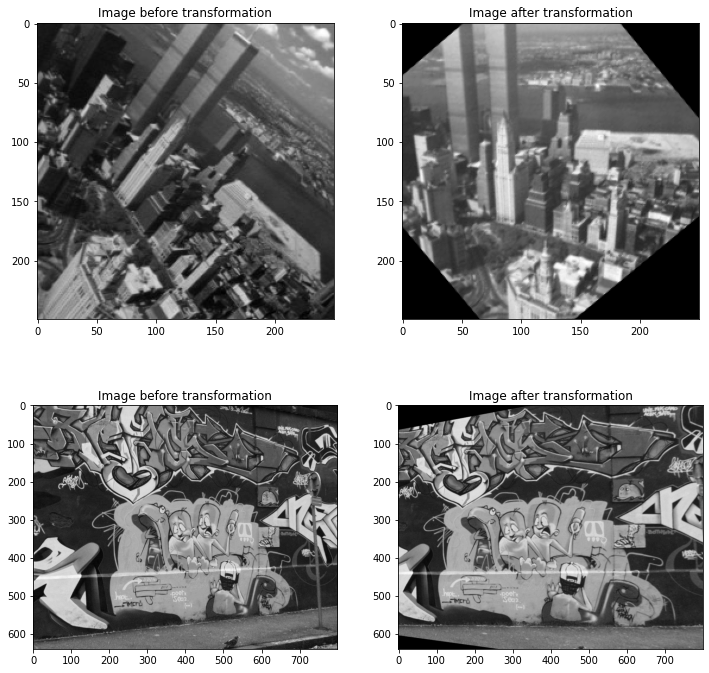

In [15]:
# final algorithm
ny_pts = np.loadtxt('data/newyork/newyork.txt', usecols=range(4))
grf_pts = np.loadtxt('data/graf/graf.txt', usecols=range(4))

grafiti = cv2.imread("data/graf/graf2.jpg")
grafiti = cv2.cvtColor(grafiti, cv2.COLOR_RGB2GRAY)
grafiti = grafiti.astype("float32")

newyork = cv2.imread("data/newyork/newyork2.jpg")
newyork = cv2.cvtColor(newyork, cv2.COLOR_RGB2GRAY)
newyork = newyork.astype("float32")

ny_homo = estimate_homography(ny_pts[:,2],ny_pts[:,3],ny_pts[:,0],ny_pts[:,1])
newyork_fix = cv2.warpPerspective(newyork,ny_homo,(newyork.shape[1], newyork.shape[0]))

g_homo = estimate_homography(grf_pts[:,2],grf_pts[:,3],grf_pts[:,0],grf_pts[:,1])
grafiti_fix = cv2.warpPerspective(grafiti,g_homo,(grafiti.shape[1], grafiti.shape[0]))

_, ax = plt.subplots(2, 2, figsize=(12, 12),squeeze=False)
ax[0][0].imshow( newyork, cmap='gray')
ax[0][0].set_title("Image before transformation")
ax[0][1].imshow( newyork_fix, cmap='gray')
ax[0][1].set_title("Image after transformation")

ax[1][0].imshow( grafiti, cmap='gray')
ax[1][0].set_title("Image before transformation")
ax[1][1].imshow( grafiti_fix, cmap='gray')
ax[1][1].set_title("Image after transformation")
